In [15]:
# import packages
import pickle
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 2000)

pd.set_option('display.float_format',lambda x : '%.2f' % x)
import numpy as np
from collections import OrderedDict
from functools import reduce
from datetime import date, datetime, timedelta
import warnings
warnings.filterwarnings("ignore")

# 绘图
import matplotlib.pyplot as plt
import seaborn as sns
# from pylab import *
# mpl.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.sans-serif']=['Simhei']
# import matplotlib as mpl
# mpl.rcParams['font.sans-serif'] = ['KaiTi']
# mpl.rcParams['font.serif'] = ['KaiTi']

# 数据处理

In [2]:
# import data
df_wenjuan = pd.read_csv('./multipleChoiceResponses.csv', encoding='GBK')
df_target_cols = pd.read_csv('./columeName.csv', encoding='GBK')

print(df_wenjuan.shape)
df_target_cols

(16716, 228)


,EngName,Colnames
0,Age,受访者年龄
1,EmploymentStatus,就业情况
2,CurrentJobTitleSelect,当前职称
3,MLToolNextYearSelect,明年将学习机器学习工具
4,MLMethodNextYearSelect,明年将学习机器学习方法
5,LanguageRecommendationSelect,首选推荐编程语言
6,JobSkillImportanceBigData,大数据在工作的重要度
7,JobSkillImportanceDegree,学位在工作的重要程度
8,JobSkillImportanceEnterpriseTools,企业工具在工作中的重要度
9,JobSkillImportancePython,python在工作中的重要度


In [3]:
# 从调查问卷表中选出目标列
df_target_data =df_wenjuan[df_target_cols['EngName'].to_list()]
df_target_data.head()

,Age,EmploymentStatus,CurrentJobTitleSelect,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,JobSkillImportanceBigData,JobSkillImportanceDegree,JobSkillImportanceEnterpriseTools,JobSkillImportancePython,JobSkillImportanceR,JobSkillImportanceSQL,JobSkillImportanceKaggleRanking,JobSkillImportanceVisualizations,DataScienceIdentitySelect,FormalEducation,Tenure,JobSatisfaction
0,nan,Employed full-time,DBA/Database Engineer,SAS Base,Random Forests,F#,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Bachelor's degree,More than 10 years,5
1,30.00,"Not employed, but looking for work",NaN,Python,Random Forests,Python,NaN,Nice to have,NaN,Unnecessary,NaN,Necessary,NaN,NaN,Yes,Master's degree,Less than a year,NaN
2,28.00,"Not employed, but looking for work",NaN,Amazon Web services,Deep learning,R,Necessary,NaN,NaN,NaN,Necessary,NaN,NaN,NaN,Yes,Master's degree,3 to 5 years,NaN
3,56.00,"Independent contractor, freelancer, or self-em...",Operations Research Practitioner,TensorFlow,Neural Nets,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Master's degree,More than 10 years,10 - Highly Satisfied
4,38.00,Employed full-time,Computer Scientist,TensorFlow,Text Mining,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Doctoral degree,More than 10 years,2


In [4]:
# 判断每一列数据的缺失值
for i in df_target_data.columns:
    print('%s列数据缺失率：%.2f%%'%(i,df_target_data[df_target_data[i].isna()].shape[0] *100 / df_target_data.shape[0]))

Age列数据缺失率：1.98%
EmploymentStatus列数据缺失率：0.00%
CurrentJobTitleSelect列数据缺失率：29.23%
MLToolNextYearSelect列数据缺失率：34.21%
MLMethodNextYearSelect列数据缺失率：35.19%
LanguageRecommendationSelect列数据缺失率：34.21%
JobSkillImportanceBigData列数据缺失率：76.33%
JobSkillImportanceDegree列数据缺失率：76.62%
JobSkillImportanceEnterpriseTools列数据缺失率：77.90%
JobSkillImportancePython列数据缺失率：75.89%
JobSkillImportanceR列数据缺失率：76.41%
JobSkillImportanceSQL列数据缺失率：76.72%
JobSkillImportanceKaggleRanking列数据缺失率：76.85%
JobSkillImportanceVisualizations列数据缺失率：76.87%
DataScienceIdentitySelect列数据缺失率：24.20%
FormalEducation列数据缺失率：10.18%
Tenure列数据缺失率：19.05%
JobSatisfaction列数据缺失率：60.06%


从统计上来看，总体上缺失率都小于80%；但是job skill importance那几列的缺失率较高，接近80%。

# 分析部分

## 每个年龄段的就业情况

In [5]:
# 大致查看一下年龄分布
df_target_data.Age.value_counts().sort_index()

0.00       10
1.00        4
2.00        1
3.00        2
4.00        1
6.00        2
9.00        1
10.00       1
11.00       3
12.00       1
13.00       3
14.00       6
15.00      13
16.00      24
17.00      42
18.00      78
19.00     193
20.00     395
21.00     584
22.00     694
23.00     839
24.00     898
25.00     969
26.00     886
27.00     842
28.00     761
29.00     731
30.00     778
31.00     597
32.00     560
33.00     530
34.00     531
35.00     577
36.00     398
37.00     384
38.00     354
39.00     320
40.00     366
41.00     223
42.00     255
43.00     198
44.00     199
45.00     226
46.00     144
47.00     166
48.00     158
49.00     132
50.00     189
51.00     100
52.00     132
53.00      83
54.00      74
55.00      91
56.00      76
57.00      88
58.00      55
59.00      49
60.00      56
61.00      38
62.00      29
63.00      42
64.00      21
65.00      28
66.00      24
67.00      19
68.00      16
69.00      16
70.00      22
71.00       5
72.00       7
73.00       6
74.00 

In [6]:
# 大致看一下就业情况分布
df_target_data.EmploymentStatus.value_counts()

Employed full-time                                      10897
Not employed, but looking for work                       2110
Independent contractor, freelancer, or self-employed     1330
Not employed, and not looking for work                    924
Employed part-time                                        917
I prefer not to say                                       420
Retired                                                   118
Name: EmploymentStatus, dtype: int64

In [7]:
# 先对年龄进行分组
df_target_data['age_status'] = pd.cut(df_target_data.Age, 
                                      bins=[0,10,20,30,40,50,60,70,80,90,100],
                                      labels=['01_10岁以下', '02_10到20岁', '03_20到30岁', '04_30到40岁', '05_40到50岁','06_50到60岁','07_60到70岁','08_70到80岁','09_80到90岁','10_90到100岁'])
# 有小部分的用户没写年龄，把这部分的人年龄都填成未知
df_target_data['age_status'].replace({np.nan:'11_未知'}, inplace=True)
# 设置一列定位键
df_target_data['age_1'] = 1

In [8]:
# 对工作情况进行分类
# 这里认为，只有正在被雇佣的才是有工作的，退休和不想说的那部分都归类到没工作
df_target_data['employed'] = 0
df_target_data.loc[df_target_data['EmploymentStatus'].isin(['Employed full-time',
                                                            'Independent contractor, freelancer, or self-employed',
                                                            'Employed part-time']), 'employed'] = 1

In [9]:
df_target_data.head()

,Age,EmploymentStatus,CurrentJobTitleSelect,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,JobSkillImportanceBigData,JobSkillImportanceDegree,JobSkillImportanceEnterpriseTools,JobSkillImportancePython,JobSkillImportanceR,JobSkillImportanceSQL,JobSkillImportanceKaggleRanking,JobSkillImportanceVisualizations,DataScienceIdentitySelect,FormalEducation,Tenure,JobSatisfaction,age_status,age_1,employed
0,nan,Employed full-time,DBA/Database Engineer,SAS Base,Random Forests,F#,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Bachelor's degree,More than 10 years,5,11_未知,1,1
1,30.00,"Not employed, but looking for work",NaN,Python,Random Forests,Python,NaN,Nice to have,NaN,Unnecessary,NaN,Necessary,NaN,NaN,Yes,Master's degree,Less than a year,NaN,03_20到30岁,1,0
2,28.00,"Not employed, but looking for work",NaN,Amazon Web services,Deep learning,R,Necessary,NaN,NaN,NaN,Necessary,NaN,NaN,NaN,Yes,Master's degree,3 to 5 years,NaN,03_20到30岁,1,0
3,56.00,"Independent contractor, freelancer, or self-em...",Operations Research Practitioner,TensorFlow,Neural Nets,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Master's degree,More than 10 years,10 - Highly Satisfied,06_50到60岁,1,1
4,38.00,Employed full-time,Computer Scientist,TensorFlow,Text Mining,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Doctoral degree,More than 10 years,2,04_30到40岁,1,1


In [10]:
# 查看分布
t_age_job = df_target_data.groupby('age_status').agg({'employed':'sum','age_1':'sum'}).reset_index().rename({'age_1':'count'},axis=1)
# 计算受聘率
t_age_job['rate_of_employed'] = t_age_job['employed'] / t_age_job['count']
# 计算每个年龄阶段受雇人数占所有受雇人数的比重
t_age_job['per_of_employed'] = t_age_job['employed'] / t_age_job['employed'].sum()
t_age_job

,age_status,employed,count,rate_of_employed,per_of_employed
0,01_10岁以下,6,12,0.50,0.00
1,02_10到20岁,208,758,0.27,0.02
2,03_20到30岁,5840,7982,0.73,0.44
3,04_30到40岁,4231,4617,0.92,0.32
4,05_40到50岁,1718,1890,0.91,0.13
5,06_50到60岁,697,804,0.87,0.05
6,07_60到70岁,172,255,0.67,0.01
7,08_70到80岁,17,40,0.42,0.00
8,09_80到90岁,1,2,0.50,0.00
9,10_90到100岁,8,15,0.53,0.00


In [11]:
# 增加total行
t_age_job.loc['total','age_status'] = '总计'
t_age_job.loc['total','employed'] = t_age_job['employed'].sum()
t_age_job.loc['total','count'] = t_age_job['count'].sum()
t_age_job.loc['total','rate_of_employed'] = t_age_job.loc['total','employed'] / t_age_job.loc['total','count']
t_age_job.loc['total','per_of_employed'] = 1

In [12]:
t_age_job

,age_status,employed,count,rate_of_employed,per_of_employed
0,01_10岁以下,6.00,12.00,0.50,0.00
1,02_10到20岁,208.00,758.00,0.27,0.02
2,03_20到30岁,5840.00,7982.00,0.73,0.44
3,04_30到40岁,4231.00,4617.00,0.92,0.32
4,05_40到50岁,1718.00,1890.00,0.91,0.13
5,06_50到60岁,697.00,804.00,0.87,0.05
6,07_60到70岁,172.00,255.00,0.67,0.01
7,08_70到80岁,17.00,40.00,0.42,0.00
8,09_80到90岁,1.00,2.00,0.50,0.00
9,10_90到100岁,8.00,15.00,0.53,0.00


In [13]:
# 计算每个年龄阶段的TGI
# 举例：10到20岁的用户受雇的比例 / 总体受雇的比例 * 100 = 0.27 / 0.79 *100
t_age_job['tgi'] = t_age_job['rate_of_employed'] / t_age_job.loc['total','rate_of_employed']
t_age_job

,age_status,employed,count,rate_of_employed,per_of_employed,tgi
0,01_10岁以下,6.00,12.00,0.50,0.00,0.64
1,02_10到20岁,208.00,758.00,0.27,0.02,0.35
2,03_20到30岁,5840.00,7982.00,0.73,0.44,0.93
3,04_30到40岁,4231.00,4617.00,0.92,0.32,1.17
4,05_40到50岁,1718.00,1890.00,0.91,0.13,1.16
5,06_50到60岁,697.00,804.00,0.87,0.05,1.10
6,07_60到70岁,172.00,255.00,0.67,0.01,0.86
7,08_70到80岁,17.00,40.00,0.42,0.00,0.54
8,09_80到90岁,1.00,2.00,0.50,0.00,0.64
9,10_90到100岁,8.00,15.00,0.53,0.00,0.68


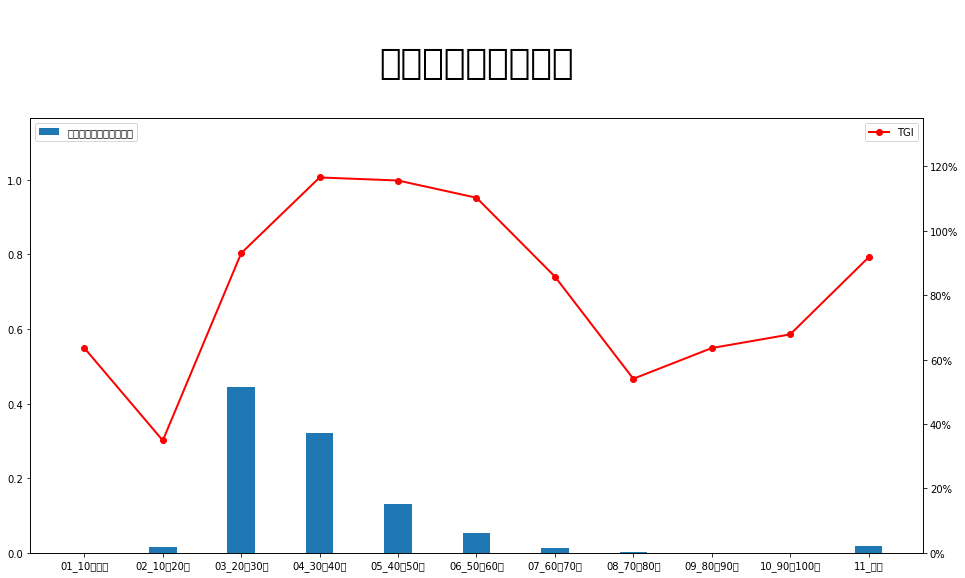

In [17]:
# 画图

x = t_age_job[t_age_job['age_status']!='总计'].age_status
y1 = t_age_job[t_age_job['age_status']!='总计'].per_of_employed
y2 = t_age_job[t_age_job['age_status']!='总计'].tgi

plt.figure(figsize=(16,8))
plt.subplot(111)
 
# 柱形宽度
bar_width = 0.35
 
# 在主坐标轴绘制柱形图
plt.bar(x,y1,bar_width,label='各个年龄段受雇人数占比')
 
# 设置坐标轴的取值范围，避免柱子过高而与图例重叠
plt.ylim(0,max(y1.max(),y2.max()))
 
# 设置图例
plt.legend(loc='upper left')
 
# 设置横坐标的标签
plt.xticks(x)
 
# 在次坐标轴上绘制折线图
plt.twinx()
# ls:线的类型，lw：宽度，o：在顶点处实心圈
plt.plot(x,y2,ls='-',lw=2,color='r',marker='o',label='TGI')
 
# 设置次坐标轴的取值范围，避免折线图波动过大
plt.ylim(0,1.35)
 
# 设置图例
plt.legend()
 
# 定义显示百分号的函数
def to_percent(number, position=0):
    return '%.f' % (number * 100) + '%'
 
# 次坐标轴的标签显示百分号 FuncFormatter：自定义格式函数包
from matplotlib.ticker import FuncFormatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
 
# 设置标题
plt.title('\n各个年龄段受雇情况\n',fontsize=36,loc='center',color = 'k')
plt.show()

### 我的电脑里没有中文字体，麻烦老师运行一次代码。

从上面的图得知，还是30岁到60岁之间的人的TGI更高，这部分人的影响最大。